<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bookdepository-Dataset" data-toc-modified-id="Bookdepository-Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bookdepository Dataset</a></span></li><li><span><a href="#Virtual-International-Authority-File-(VIAF)-Dataset" data-toc-modified-id="Virtual-International-Authority-File-(VIAF)-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Virtual International Authority File (VIAF) Dataset</a></span><ul class="toc-item"><li><span><a href="#Check-VIAF-links-by-using-the-Bookdepository-author-names" data-toc-modified-id="Check-VIAF-links-by-using-the-Bookdepository-author-names-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Check VIAF links by using the Bookdepository author names</a></span></li><li><span><a href="#Fetching-gender-data-from-VIAF-pages-with-Beautifulsoup" data-toc-modified-id="Fetching-gender-data-from-VIAF-pages-with-Beautifulsoup-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Fetching gender data from VIAF pages with Beautifulsoup</a></span></li><li><span><a href="#Statistics-(VIAF)" data-toc-modified-id="Statistics-(VIAF)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Statistics (VIAF)</a></span></li></ul></li><li><span><a href="#Predicting-gender-from-first-name-by-using-Natural-Language-Processing" data-toc-modified-id="Predicting-gender-from-first-name-by-using-Natural-Language-Processing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Predicting gender from first name by using Natural Language Processing</a></span><ul class="toc-item"><li><span><a href="#Statistics-(NTLK)" data-toc-modified-id="Statistics-(NTLK)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Statistics (NTLK)</a></span></li></ul></li><li><span><a href="#Summing-it-all-up" data-toc-modified-id="Summing-it-all-up-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Summing it all up</a></span><ul class="toc-item"><li><span><a href="#Plots" data-toc-modified-id="Plots-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Plots</a></span></li></ul></li></ul></div>

In [1]:
import requests
import pandas as pd
import datetime
from bs4 import BeautifulSoup

## Bookdepository Dataset
This dataset is a result of webscraping. I fetched books that were published under natural history category in bookdepository [webpage](https://www.bookdepository.com/category/2985/Natural-History/browse/viewmode/all?page=1). The result was ~ 10,000 books with titles, authors and publishing year. I filtered this data and retrieved the natural history books for each year between 2015 and 2021. In this project I will check only the books published 2021 = 982 books.

In [2]:
# Import Bookdepository CSV
books = pd.read_csv("/Users/nat/Desktop/Code/Code Projects/Book-Gender/Data/Bookdepository/NaturalHistory-Bookdepository-2021.csv", dtype=str)
books.head(5)

,Unnamed: 0,authors,titles,date,year
0,17,Merlin Sheldrake,Entangled Life,02 Sep 2021,2021
1,35,Jeremy Clarkson,Diddly Squat,11 Nov 2021,2021
2,38,Lia Leendertz,The Almanac,02 Sep 2021,2021
3,43,Sosuke Natsukawa,The Cat Who Saved Books,16 Sep 2021,2021
4,62,James Stewart,Dinosaur Therapy,24 Aug 2021,2021


## Virtual International Authority File (VIAF) Dataset

This is the dataset downloaded from [here](http://viaf.org/viaf/data/). The unzipped file is 9,37 GB. In another notebook I simplified this file by getting the rows that only contained wikipedia pages. Because most authors have a wikipedia page. This way the file size decreased to ~ 235MB.


In [47]:
# Import VIAF CSV (I changed the way I edited VIAF file. This is the 2nd version)
viaf_db = pd.read_csv("/Users/nat/Desktop/Code/Code Projects/Book-Gender/Data/Viaf/Viaf-simple.csv", dtype=str)

viaf_db.head(5)


,Unnamed: 0,viaf,info,Name
0,11,http://viaf.org/viaf/10001407,Wikipedia@https://cs.wikipedia.org/wiki/Pavel_...,Pavel Hrach
1,70,http://viaf.org/viaf/100109330,Wikipedia@https://fr.wikipedia.org/wiki/Emile_...,Emile de Meester de Ravestein
2,121,http://viaf.org/viaf/100144403,Wikipedia@https://cy.wikipedia.org/wiki/Teresa...,Teresa Magalhães
3,246,http://viaf.org/viaf/100177876,Wikipedia@https://nl.wikipedia.org/wiki/Guilla...,Guillaume Caoursin
4,331,http://viaf.org/viaf/100208187,"Wikipedia@https://ru.wikipedia.org/wiki/Ришле,...","Ришле, Сезар-Пьер"


### Check VIAF links by using the Bookdepository author names

So VIAF file may contain many people and not necesseraly only authors. But we already have our author names from bookdepository. All we need to do is to cross check and link the book depository authors to their VIAF pages (if it exists). 

Note: The blow process takes a long time. Grab a coffee : )

In [ ]:
links = []
author_with_viaf = []
books_with_viaf = []

names_to_predict = []
author_without_viaf = []
books_without_viaf = []

for i in range(len(books['authors'])):
    
    # Find whether the name in bookdeposit dataset exists in VIAF dataset
    name = books['authors'][i]
    #print(i)
    
    boolean_finding = viaf_db['Name'].str.contains(name, case=False).any() # True or False
    
    # If its true get the viaf link
    if boolean_finding == True:
        
        df2 = viaf_db[(viaf_db['Name'].str.contains(name, case=False))]
        viaf_link = df2['viaf'].loc[df2.index[0]]
        links.append(viaf_link)
        
        author_with_viaf.append(books['authors'][i])
        books_with_viaf.append(books['titles'][i])
    
    else:
        names_to_predict.append(name)
        author_without_viaf.append(books['authors'][i])
        books_without_viaf.append(books['titles'][i])

print("Cross checking finished. If a VIAF link exists for an author it was saved in the list.")
    
    

In [9]:
# Convert lists to dataframe and then save locally (Saving the files makes it easier to test)
# Create dataframe from the lists
zipped1 = list(zip(author_with_viaf, books_with_viaf, links))
zipped2 = list(zip(author_without_viaf, books_without_viaf, names_to_predict))

viaf_authors = pd.DataFrame(zipped1, columns=['Author', 'Book', 'Links'])
predict_authors = pd.DataFrame(zipped2, columns=['Author', 'Book', 'Names'])

# storing these dataframes in a csv file
viaf_authors.to_csv(r'/Users/nat/Desktop/Code/Code Projects/Book-Gender/Data/Viaf/Viaf-author-links-2021.csv') #, index = None
predict_authors.to_csv(r'/Users/nat/Desktop/Code/Code Projects/Book-Gender/Data/Viaf/Author_names_to_predict-2021.csv') 



In [14]:
b = len(books)
v = len(viaf_authors)
p = len(predict_authors)
print("There are {} books published in 2021 within Nature History category. This code managed to link {} of these book authors to their personal VIAF pages from which we will retrieve author gender information. We need to predict the gender for the remaining {} authors.".format(b,v,p))


There are 982 books published in 2021 within Nature History category. This code managed to link 311 of these book authors to their personal VIAF pages from which we will retrieve author gender information. We need to predict the gender for the remaining 671 authors.


### Fetching gender data from VIAF pages with Beautifulsoup 

In [45]:
# Import CSV
viaf_authors = pd.read_csv("/Users/nat/Desktop/Code/Code Projects/Book-Gender/Data/Viaf/Viaf-author-links-2021.csv", dtype=str)

# Create an empty column for gender
viaf_authors["Gender"] = ""

# Drop unnecessary columns
viaf_authors.drop('Unnamed: 0', axis=1, inplace=True)

viaf_authors.head(5)

,Author,Book,Links,Gender
0,Merlin Sheldrake,Entangled Life,http://viaf.org/viaf/31157340763509922488,
1,Jeremy Clarkson,Diddly Squat,http://viaf.org/viaf/102195935,
2,James Stewart,Dinosaur Therapy,http://viaf.org/viaf/121702213,
3,James Rebanks,English Pastoral,http://viaf.org/viaf/311766886,
4,Raynor Winn,The Wild Silence,http://viaf.org/viaf/74154921352863592450,


In [ ]:

for i in range(len(viaf_authors)):
    name = viaf_authors["Author"][i]
    #print(i)
    
    url = viaf_authors['Links'][i]
    response = requests.get(url)
    html = response.content
    soup = BeautifulSoup(html, "lxml")
    
    gender = []
    for item in soup.select("div.subsection"):
        text = item.text.strip()
        text = text.replace('\n','')
        text = text.replace('\t',' ')
        text = text.replace('   ','')
        gender.append(text)

        text = text[0].split('Nationality')
        text = str(text[0])
        
    f = "Female" in gender[0]
    m = "Male" in gender[0]

    if f == True:
        viaf_authors["Gender"][i] = "Female"
        #print(name, "Female")  
    elif m == True:
        viaf_authors["Gender"][i] = "Male"
        #print(name, "Male")   
    else:
        viaf_authors["Gender"][i] = "Unknown"
        #print(name, "Unknown")


In [49]:
# Export to CSV 
viaf_authors.to_csv('/Users/nat/Desktop/Code/Code Projects/Book-Gender/Data/Viaf/Viaf-authors-gender-2021.csv')

# Import CSV
authors = pd.read_csv("/Users/nat/Desktop/Code/Code Projects/Book-Gender/Data/Viaf/Viaf-authors-gender-2021.csv", dtype=str)

# Drop unnecessary columns
authors.drop('Unnamed: 0', axis=1, inplace=True)

authors.head(5)

,Author,Book,Links,Gender
0,Merlin Sheldrake,Entangled Life,http://viaf.org/viaf/31157340763509922488,NaN
1,Jeremy Clarkson,Diddly Squat,http://viaf.org/viaf/102195935,NaN
2,James Stewart,Dinosaur Therapy,http://viaf.org/viaf/121702213,NaN
3,James Rebanks,English Pastoral,http://viaf.org/viaf/311766886,NaN
4,Raynor Winn,The Wild Silence,http://viaf.org/viaf/74154921352863592450,NaN


### Statistics (VIAF)

In [16]:
f1 = authors['Gender'].value_counts()['Female'] # 113 <class 'numpy.int64'>
m1 = authors['Gender'].value_counts()['Male'] # 202
u1 = authors['Gender'].value_counts()['Unknown'] # 24

data1 = pd.DataFrame({
    'female': [f1],
    'male': [m1],
    'unknown': [u1]
})
data1

,female,male,unknown
0,106,175,30


## Predicting gender from first name by using Natural Language Processing

For those bookdepository author names that didnt match with any VIAF data we can use NLTK to train and predict the binary gender of the authors from their first names. 

Of course the method is problematic. Not just because it predicts and assigns the wrong  gender to authors' first name but also because of the binary gender assumption. In this method there is no room for non-bianry and trans people. I tested the trained NLTK with my name and with 80% accuracy the code said I was a male. Well, I'm not. 


In [17]:
# Source: https://www.geeksforgeeks.org/python-gender-identification-by-name-using-nltk/

import random
from nltk.corpus import names
import nltk

In [50]:
# Import CSV
predict_authors = pd.read_csv("/Users/nat/Desktop/Code/Code Projects/Book-Gender/Data/Viaf/Author_names_to_predict-2021.csv", dtype=str)

# Create a colum for first names
predict_authors["FirstName"] = ""
predict_authors['FirstName'] = predict_authors['Names'].str.split(' ', expand=True)

# Create an empty column for gender
predict_authors["Gender"] = ""

# Drop unnecessary columns
predict_authors.drop('Unnamed: 0', axis=1, inplace=True)

predict_authors.head(5)

,Author,Book,Names,FirstName,Gender
0,Lia Leendertz,The Almanac,Lia Leendertz,Lia,
1,Sosuke Natsukawa,The Cat Who Saved Books,Sosuke Natsukawa,Sosuke,
2,Lelia Wanick Salgado,Sebastiao Salgado. GENESIS,Lelia Wanick Salgado,Lelia,
3,Rodney Habib,The Forever Dog,Rodney Habib,Rodney,
4,Andrew Cotter,Dog Days,Andrew Cotter,Andrew,


In [2]:
import random
from nltk.corpus import names
import nltk

# Source1: ntlk prediction: https://www.geeksforgeeks.org/python-gender-identification-by-name-using-nltk/

def gender_features(word):
    return {'last_letter':word[-1]}

labeled_names = ([(name, 'Female') for name in names.words('/Users/nat/Desktop/Code/Code Projects/Book-Gender/Data/Names/female.txt')]+
             [(name, 'Male') for name in names.words('/Users/nat/Desktop/Code/Code Projects/Book-Gender/Data/Names/male.txt')])

random.shuffle(labeled_names)

# we use the feature extractor to process the names data.
featuresets = [(gender_features(n), gender) 
               for (n, gender)in labeled_names]
  
# Divide the resulting list of feature
# sets into a training set and a test set.
train_set, test_set = featuresets[500:], featuresets[:500]
  
# The training set is used to 
# train a new "naive Bayes" classifier.
classifier = nltk.NaiveBayesClassifier.train(train_set)

predicted_gender = []

# Use the new dataframe with Nan instead of "book_database" dataframe because emoty cells cause issues.

for i in range(len(predict_authors)): #iterate over rows
    
    # Get the name
    name = predict_authors['FirstName'][i]
    #print(name)
    
    # If the name is in the database check gender
    if name in open('/Users/nat/Desktop/Code/Code Projects/Book-Gender/Data/Names/Allnames').read():
        gender = classifier.classify(gender_features(name))
        predict_authors["Gender"][i] = str(gender)
        #print(gender)
    
    # If the name is empty print unknown
    elif name == 0:
        predict_authors["Gender"][i] = "Unknown"
        #print("Empty")
        
    # If the name is not in the database print unknown
    else:
        #print ('Unknown')
        predict_authors["Gender"][i] = "Unknown"
    
    

NameError: name 'predict_authors' is not defined

In [52]:
#pd.set_option('display.max_rows', None)
predict_authors.head(5)

,Author,Book,Names,FirstName,Gender
0,Lia Leendertz,The Almanac,Lia Leendertz,Lia,Female
1,Sosuke Natsukawa,The Cat Who Saved Books,Sosuke Natsukawa,Sosuke,Unknown
2,Lelia Wanick Salgado,Sebastiao Salgado. GENESIS,Lelia Wanick Salgado,Lelia,Female
3,Rodney Habib,The Forever Dog,Rodney Habib,Rodney,Female
4,Andrew Cotter,Dog Days,Andrew Cotter,Andrew,Male


### Statistics (NTLK)

In [21]:
f2 = predict_authors['Gender'].value_counts()['Female'] # 133 OR 186
m2 = predict_authors['Gender'].value_counts()['Male'] # 296
u2 = predict_authors['Gender'].value_counts()['Unknown'] # 85

data2 = pd.DataFrame({
    'female': [f2],
    'male': [m2],
    'unknown': [u2]
})
data2

,female,male,unknown
0,247,311,113


## Summing it all up

In [39]:
# Total of VIAF gender & predicted gender
total_f = f1 + f2
total_m = m1 + m2
total_u = u1 + u2

total_with_unknown = pd.DataFrame({
    'Female': [total_f],
    'Male': [total_m],
    'Unknown': [total_u]
})

total_without_unknown = pd.DataFrame({
    'Female': [total_f],
    'Male': [total_m]
})

total_without_unknown

,Female,Male
0,353,486


### Plots
Lets plot the results with and without the unknown gender

/Users/nat/opt/anaconda3/envs/finalspace/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


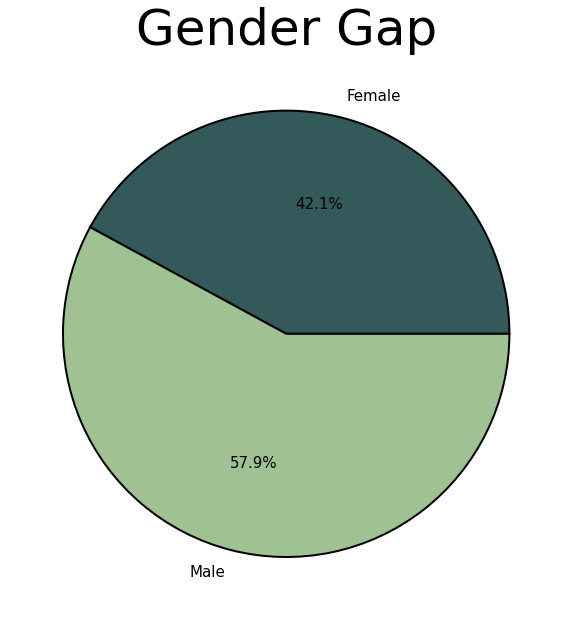

In [43]:
from matplotlib import pyplot as plt

mylabels = ["Female", "Male"]
mycolors = ["#34595a", "#a0c293"]

#controls default text size
plt.rc('font', size=15)

# plot size
plt.rcParams["figure.figsize"] = [10, 15]

#set title font to size 50
plt.rc('axes', titlesize=50) 

plt.pie(total_without_unknown, 
        labels = mylabels, 
        autopct ='%1.1f%%',
        colors = mycolors,
        wedgeprops = {"edgecolor" : "black",
                      'linewidth': 2,
                      'antialiased': True})
#plt.legend(loc='upper left')
plt.title('Gender Gap')

# Save figure
plt.savefig('/Users/nat/Desktop/gender-gap.png', dpi = 100)

# Display the graph onto the screen
plt.show() 

/Users/nat/opt/anaconda3/envs/finalspace/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
/Users/nat/opt/anaconda3/envs/finalspace/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


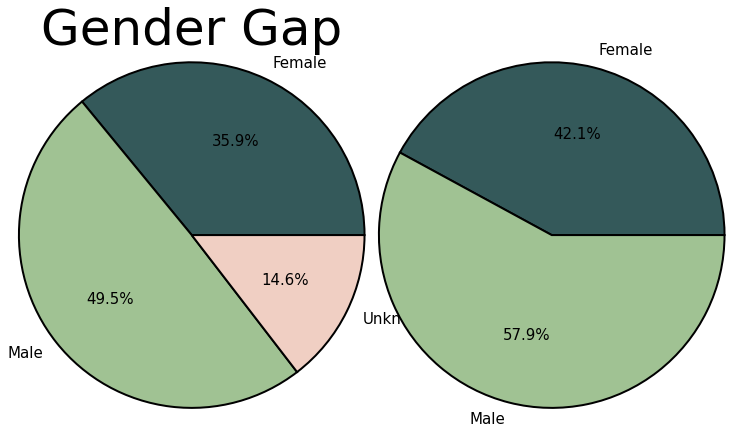

In [36]:
fig = plt.figure()

mylabels1 = ["Female", "Male", "Unknown"]
mycolors1 = ["#34595a", "#a0c293", "#f0cfc3"]

mylabels2 = ["Female", "Male"]
mycolors2 = ["#34595a", "#a0c293"]

ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(total_with_unknown, 
        labels=mylabels1, 
        radius = 1.2,
        autopct ='%1.1f%%',
        colors = mycolors1,
        wedgeprops = {"edgecolor" : "black",
                      'linewidth': 2,
                      'antialiased': True})

ax2 = fig.add_axes([.5, .0, .5, .5], aspect=1)
ax2.pie(total_without_unknown, 
        labels=mylabels2, 
        radius = 1.2,
        autopct ='%1.1f%%',
        colors = mycolors2,
        wedgeprops = {"edgecolor" : "black",
                      'linewidth': 2,
                      'antialiased': True})

ax1.set_title('Gender Gap')
#ax2.set_title('Title for ax2')
plt.show()